# 建模算法

![jupyter](https://pic4.zhimg.com/v2-f4cfaefb1cce4f181f6eaefedb5e6c13_r.jpg)

### 线性规划

![jupyter](pic/1.png)

In [1]:
import pulp

In [2]:
MyProbLP = pulp.LpProblem("LPProbDemo1", sense=pulp.LpMaximize)
"""
定义一个规划问题
pulp.LpProblem 是定义问题的构造函数。
"LPProbDemo1"是用户定义的问题名（用于输出信息）。
参数 sense 用来指定求最小值/最大值问题，可选参数值：LpMinimize、LpMaximize 。本例 “sense=pulp.LpMaximize” 表示求目标函数的最大值。
"""

'\n定义一个规划问题\npulp.LpProblem 是定义问题的构造函数。\n"LPProbDemo1"是用户定义的问题名（用于输出信息）。\n参数 sense 用来指定求最小值/最大值问题，可选参数值：LpMinimize、LpMaximize 。本例 “sense=pulp.LpMaximize” 表示求目标函数的最大值。\n'

In [3]:
x1 = pulp.LpVariable('x1', lowBound=0, upBound=7, cat='Continuous') 
x2 = pulp.LpVariable('x2', lowBound=0, upBound=7, cat='Continuous')
x3 = pulp.LpVariable('x3', lowBound=0, upBound=7, cat='Continuous') 
"""
pulp.LpVariable 是定义决策变量的函数。
‘x1’ 是用户定义的变量名。
参数 lowBound、upBound 用来设定决策变量的下界、上界；可以不定义下界/上界，默认的下界/上界是负无穷/正无穷。本例中 x1,x2,x3 的取值区间为 [0,7]。
参数 cat 用来设定变量类型，可选参数值：‘Continuous’ 表示连续变量（默认值）、’ Integer ’ 表示离散变量（用于整数规划问题）、’ Binary ’ 表示0/1变量（用于0/1规划问题）。
"""

'\npulp.LpVariable 是定义决策变量的函数。\n‘x1’ 是用户定义的变量名。\n参数 lowBound、upBound 用来设定决策变量的下界、上界；可以不定义下界/上界，默认的下界/上界是负无穷/正无穷。本例中 x1,x2,x3 的取值区间为 [0,7]。\n参数 cat 用来设定变量类型，可选参数值：‘Continuous’ 表示连续变量（默认值）、’ Integer ’ 表示离散变量（用于整数规划问题）、’ Binary ’ 表示0/1变量（用于0/1规划问题）。\n'

In [4]:
MyProbLP += 2*x1 + 3*x2 - 5*x3  	# 设置目标函数
MyProbLP += (2*x1 - 5*x2 + x3 >= 10)  # 不等式约束
MyProbLP += (x1 + 3*x2 + x3 <= 12)  # 不等式约束
MyProbLP += (x1 + x2 + x3 == 7)  # 等式约束


In [5]:
MyProbLP.solve()
print("Status:", pulp.LpStatus[MyProbLP.status]) # 输出求解状态
for v in MyProbLP.variables():
    print(v.name, "=", v.varValue)  # 输出每个变量的最优值
print("F(x) = ", pulp.value(MyProbLP.objective))  #输出最优解的目标函数值    
"""
solve() 是求解函数。PuLP默认采用 CBC 求解器来求解优化问题，也可以调用其它的优化器来求解，如：GLPK，COIN CLP/CBC，CPLEX，和GUROBI，但需要另外安装。
"""

Status: Optimal
x1 = 6.4285714
x2 = 0.57142857
x3 = 0.0
F(x) =  14.57142851


'\nsolve() 是求解函数。PuLP默认采用 CBC 求解器来求解优化问题，也可以调用其它的优化器来求解，如：GLPK，COIN CLP/CBC，CPLEX，和GUROBI，但需要另外安装。\n'

![jupyter](pic/2.png)

In [3]:
MyProbLP1 = pulp.LpProblem("LPProbDemo", sense=pulp.LpMaximize)
x11 = pulp.LpVariable('x11', lowBound=0, upBound=8, cat='Continuous') 
x21 = pulp.LpVariable('x21', lowBound=0, upBound=7.5, cat='Continuous')
MyProbLP1 += (10*x11 + 9*x21)  	# 设置目标函数
MyProbLP1 += (6*x11 + 5*x21 <= 60)  # 不等式约束
MyProbLP1 += (10*x11 + 20*x21 <= 150)  # 不等式约束
MyProbLP1.solve()
print("Status:", pulp.LpStatus[MyProbLP1.status]) # 输出求解状态
for v in MyProbLP1.variables():
    print(v.name, "=", v.varValue)  # 输出每个变量的最优值
print("F(x) = ", pulp.value(MyProbLP1.objective))  #输出最优解的目标函数值   

Status: Optimal
x11 = 6.4285714
x21 = 4.2857143
F(x) =  102.8571427


## 整数规划

![jupyter](pic/3.png)

In [5]:
import pulp
MyProIInter = pulp.LpProblem("整数规划", sense=pulp.LpMaximize)
x0 = pulp.LpVariable('x0', lowBound=0, upBound=8, cat='Integer')
x01 = pulp.LpVariable('x01', lowBound=0, upBound=7, cat='Integer')
MyProIInter += (10*x0 + 9*x01)
MyProIInter += (6*x0 + 5*x01 <= 60)
MyProIInter += (10*x0 + 20*x01 <= 150)
MyProIInter.solve()
print(MyProIInter.name)
print("Status:", pulp.LpStatus[MyProIInter.status]) # 输出求解状态
for v in MyProIInter.variables():
    print(v.name, "=", v.varValue)  # 输出每个变量的最优值
print("F(x) = ", pulp.value(MyProIInter.objective))  #输出最优解的目标函数值

整数规划
Status: Optimal
x0 = 8.0
x01 = 2.0
F(x) =  98.0


## 0-1规划

![jupyter](pic/4.png)

In [1]:
import pulp
InvestLP = pulp.LpProblem("Invest decision problem", sense=pulp.LpMaximize)
x1 = pulp.LpVariable('A', cat='Binary')  # 定义 x1，A 项目
x2 = pulp.LpVariable('B', cat='Binary')  # 定义 x2，B 项目
x3 = pulp.LpVariable('C', cat='Binary')  # 定义 x3，C 项目
x4 = pulp.LpVariable('D', cat='Binary')  # 定义 x4，D 项目
x5 = pulp.LpVariable('E', cat='Binary')  # 定义 x5，E 项目
InvestLP += (150*x1 + 210*x2 + 60*x3 + 80*x4 + 180*x5)  # 设置目标函数 f(x)
InvestLP += (210*x1 + 300*x2 + 100*x3 + 130*x4 + 260*x5 <= 600)  # 不等式约束
InvestLP += (x1 + x2 + x3 == 1)  # 等式约束
InvestLP += (x3 + x4 <= 1)  # 不等式约束
InvestLP += (x5 - x1 <= 0)  # 不等式约束
InvestLP.solve()
print(InvestLP.name)  # 输出求解状态
print("Status youcans:", pulp.LpStatus[InvestLP.status])  # 输出求解状态
for v in InvestLP.variables():
    print(v.name, "=", v.varValue)  # 输出每个变量的最优值
print("Max f(x) =", pulp.value(InvestLP.objective))  # 输出最优解的目标函数值

Invest_decision_problem
Status youcans: Optimal
A = 1.0
B = 0.0
C = 0.0
D = 1.0
E = 1.0
Max f(x) = 410.0


C:\Bin\envir\python\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


## 一元线性回归

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2799.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           6.98e-74
Time:                        10:58:14   Log-Likelihood:                -127.45
No. Observations:                 100   AIC:                             258.9
Df Residuals:                      98   BIC:                             264.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4155      0.174     13.918      0.0

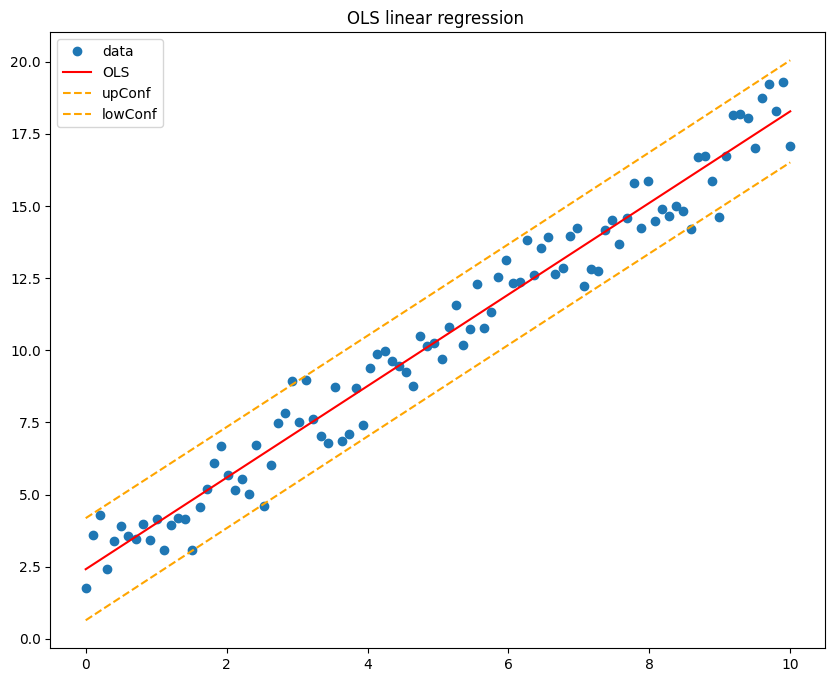

In [5]:
# LinearRegression_v1.py
# Linear Regression with statsmodels (OLS: Ordinary Least Squares)
# v1.0: 调用 statsmodels 实现一元线性回归
# 日期：2021-05-04

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# 主程序 = 关注 Youcans，分享原创系列 https://blog.csdn.net/youcans =
def main():  # 主程序

    # 生成测试数据:
    nSample = 100
    x1 = np.linspace(0, 10, nSample)  # 起点为 0，终点为 10，均分为 nSample个点
    e = np.random.normal(size=len(x1))  # 正态分布随机数
    yTrue = 2.36 + 1.58 * x1  #  y = b0 + b1*x1
    yTest = yTrue + e  # 产生模型数据

    # 一元线性回归：最小二乘法(OLS)
    X = sm.add_constant(x1)  # 向矩阵 X 添加截距列（x0=[1,...1]）
    model = sm.OLS(yTest, X)  # 建立最小二乘模型（OLS）
    results = model.fit()  # 返回模型拟合结果
    yFit = results.fittedvalues  # 模型拟合的 y值
    prstd, ivLow, ivUp = wls_prediction_std(results) # 返回标准偏差和置信区间

    # OLS model: Y = b0 + b1*X + e
    print(results.summary())  # 输出回归分析的摘要
    print("\nOLS model: Y = b0 + b1 * x")  # b0: 回归直线的截距，b1: 回归直线的斜率
    print('Parameters: ', results.params)  # 输出：拟合模型的系数

    # 绘图：原始数据点，拟合曲线，置信区间
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(x1, yTest, 'o', label="data")  # 原始数据
    ax.plot(x1, yFit, 'r-', label="OLS")  # 拟合数据
    ax.plot(x1, ivUp, '--',color='orange',label="upConf")  # 95% 置信区间 上限
    ax.plot(x1, ivLow, '--',color='orange',label="lowConf")  # 95% 置信区间 下限
    ax.legend(loc='best')  # 显示图例
    plt.title('OLS linear regression ')
    plt.show()
    return

# = 关注 Youcans，分享原创系列 https://blog.csdn.net/youcans =
if __name__ == '__main__': #YouCans, XUPT
    main()


## 多元线性回归

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     351.6
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           1.26e-51
Time:                        10:59:37   Log-Likelihood:                -82.048
No. Observations:                 100   AIC:                             172.1
Df Residuals:                      96   BIC:                             182.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9389      0.138     35.895      0.0

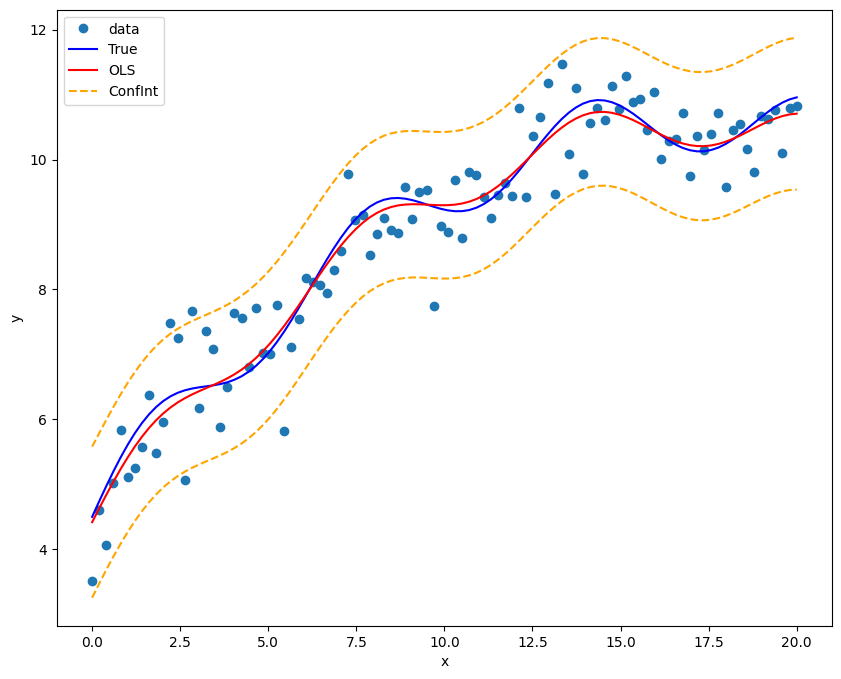

In [6]:

# LinearRegression_v2.py
# Linear Regression with statsmodels (OLS: Ordinary Least Squares)
# v2.0: 调用 statsmodels 实现多元线性回归
# 日期：2021-05-04

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# 主程序
def main():  # 主程序

    # 生成测试数据:
    nSample = 100
    x0 = np.ones(nSample)  # 截距列 x0=[1,...1]
    x1 = np.linspace(0, 20, nSample)  # 起点为 0，终点为 10，均分为 nSample个点
    x2 = np.sin(x1)
    x3 = (x1-5)**2
    X = np.column_stack((x0, x1, x2, x3))  # (nSample,4): [x0,x1,x2,...,xm]
    beta = [5., 0.5, 0.5, -0.02] # beta = [b1,b2,...,bm]
    yTrue = np.dot(X, beta)  # 向量点积 y = b1*x1 + ...+ bm*xm
    yTest = yTrue + 0.5 * np.random.normal(size=nSample)  # 产生模型数据
    
    # 多元线性回归：最小二乘法(OLS)
    model = sm.OLS(yTest, X)  # 建立 OLS 模型: Y = b0 + b1*X + ... + bm*Xm + e
    results = model.fit()  # 返回模型拟合结果
    yFit = results.fittedvalues  # 模型拟合的 y值
    print(results.summary())  # 输出回归分析的摘要
    print("\nOLS model: Y = b0 + b1*X + ... + bm*Xm")
    print('Parameters: ', results.params)  # 输出：拟合模型的系数    

    # 绘图：原始数据点，拟合曲线，置信区间
    prstd, ivLow, ivUp = wls_prediction_std(results) # 返回标准偏差和置信区间
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(x1, yTest, 'o', label="data")  # 实验数据（原始数据+误差）
    ax.plot(x1, yTrue, 'b-', label="True")  # 原始数据
    ax.plot(x1, yFit, 'r-', label="OLS")  # 拟合数据
    ax.plot(x1, ivUp, '--',color='orange', label="ConfInt")  # 置信区间 上届
    ax.plot(x1, ivLow, '--',color='orange')  # 置信区间 下届
    ax.legend(loc='best')  # 显示图例
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    return

#= 关注 Youcans，分享原创系列 https://blog.csdn.net/youcans =
if __name__ == '__main__':
    main()
    


Dep.Variable: y 因变量
Model：OLS 最小二乘模型
Method: Least Squares 最小二乘
No. Observations: 样本数据的数量
Df Residuals：残差自由度(degree of freedom of residuals)
Df Model：模型自由度(degree of freedom of model)
Covariance Type：nonrobust 协方差阵的稳健性
R-squared：R 判定系数
Adj. R-squared: 修正的判定系数
F-statistic： 统计检验 F 统计量
Prob (F-statistic): F检验的 P值
Log likelihood: 对数似然

coef：自变量和常数项的系数，b1,b2,...bm,b0
std err：系数估计的标准误差
t：统计检验 t 统计量
P>|t|：t 检验的 P值
[0.025, 0.975]：估计参数的 95%置信区间的下限和上限
Omnibus：基于峰度和偏度进行数据正态性的检验
Prob(Omnibus)：基于峰度和偏度进行数据正态性的检验概率
Durbin-Watson：检验残差中是否存在自相关
Skewness：偏度，反映数据分布的非对称程度
Kurtosis：峰度，反映数据分布陡峭或平滑程度
Jarque-Bera(JB)：基于峰度和偏度对数据正态性的检验
Prob(JB)：Jarque-Bera(JB)检验的 P值。
Cond. No.：检验变量之间是否存在精确相关关系或高度相关关系。

回归分析是基于数据的建模，在导入数据后首先要进行数据探索，对给出的或收集的数据有个大概的了解，主要包括数据质量探索和数据特征分析。数据准备中的异常值分析，往往就需要用到箱形图（Boxplot）。对于数据特征的分析，经常使用频率分布图或频率分布直方图（Hist），饼图（Pie）